# Lab 12

This lab is an exercise in exploratory data analysis using the Pandas library. The data we are working with is a domestic flight delay information from 2015 provided by the US Department of Transportation.

The dataset can be found in Files -> Lab -> Lab 12.

For this lab, we will only be looking at a 2 week subset of the data that contains information on all flights on the December 18th  to December 31st, 2015 only. There are thousands of flights in a single day so this should be plenty of data for us to explore.

Start by downloading the following three files and save them in the same directory as your lab notebook.

* <b> flightdat.csv</b> This file contains all the flight information.
* <b> airlines.csv</b> This file contains a table of airline names.
* <b> airports.csv</b> This file contains the airport names for each of the airport codes as well as the latitude and longitude coordinates for each of the airports. 

In the <b>flightdat.csv</b> file,  the columns are:
| Column Name   |      Description    | 
|:----------:|:-------------|
|YEAR| Flight year  - All values are 2015
|MONTH| Flight month (1-12)
|DAY| Flight day (1-31) |
|DAY_OF_WEEK| 1-7 for Sunday - Saturday
| AIRLINE| Airline identifier|
|FLIGHT_NUMBER| Flight number |
|TAIL_NUMBER |  Plane tail number |
|ORIGIN_AIRPORT| Origin airport |
|DESTINATION_AIRPORT| Destination airport |
|SCHEDULED_DEPARTURE| Schedule departure time|
|DEPARTURE_TIME| WHEEL_OFF - TAXI_OUT| 
|DEPARTURE_DELAY| Total Delay on Departure |
|TAXI_OUT| The time duration elapsed between departure from the origin airport gate and wheels off | 
|WHEELS_OFF|  Time aircraft leaves ground
|SCHEDULED_TIME| Scheduled time for trip
|ELAPSED_TIME|AIR_TIME + TAXI_IN + TAXI_OUT 
|AIR_TIME| Actual time from WHEELS_ON to WHEELS_OFF
|DISTANCE| Distance traveled
|WHEELS_ON| Time wheels of aircraft touch the ground
|TAXI_IN| The time duration elapsed between wheels-on and gate arrival at the destination airport
|SCHEDULED_ARRIVAL| Scheduled arrival time
|ARRIVAL_TIME| Actual arrival time
|ARRIVAL_DELAY| ARRIVAL_TIME - SCHEDULED_ARRIVAL
|DIVERTED| Landed in another airport
|CANCELED| 1 if the flight was canceled, 0 if the flight was not canceled 
|CANCELLATION_REASON| Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security
|AIR_SYSTEM_DELAY| Delay caused by air system
|SECURITY_DELAY|Delay caused by security
|AIRLINE_DELAY|Delay caused by airline
|LATE_AIRCRAFT_DELAY| Delay caused by aircraft
|WEATHER_DELAY|  Delay caused by weather

Delays are in minutes.

# Problem 0

First, load the data using `pd.read_csv` and take a look at all three DataFrames. Only <b> flightdat.csv</b> contains the actual flight information. The others contain information on the airline and airport codes.

Let's get to know this data first. 
* Load <b>flightdat.csv</b> into a DataFrame called `df`. 
* How many rows and columns are in the `df` DataFrame?
* How many unique airlines are there in this DataFrame? How many unique departure airports are there?
* Use `.head()` and `.sample()` to look at 
    * the first 10 rows and
    * a random 10 rows
* Print out all the column names.
* Because our dataset only contains information on flights from December 18th to the 31st (14 days), we really only need to keep the `DAY` column. The YEAR and MONTH aren't useful to us. Drop these columns from <b> df</b>. Also drop FLIGHT_NUMBER and TAIL_NUMBER.  
* Re-print the column name. 


In [1]:
# first import pandas
import pandas as pd

In [2]:
# Load the data and take a look at some of the rows of df
df = pd.read_csv("flightdat.csv")
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,12,18,5,AA,1230,N3BRAA,SEA,DFW,5,...,629.0,34.0,0,0,NaN,0.0,0.0,34.0,0.0,0.0
1,2015,12,18,5,DL,1426,N803DN,SFO,MSP,5,...,523.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,12,18,5,OO,5272,N127SY,DEN,MCI,6,...,327.0,36.0,0,0,NaN,0.0,0.0,36.0,0.0,0.0
3,2015,12,18,5,AA,862,N925UY,LAS,DCA,6,...,710.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,12,18,5,UA,1601,N35204,ANC,DEN,8,...,709.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print("In flightdat.csv...")
# How many rows and columns are in the `df` DataFrame?
print(f"* There are `{df.size = }` rows.")
print(f"* There are `{df.columns.size = }` columns.")

# How many unique airlines are there in this DataFrame?
print(f"* There are `{df['AIRLINE'].unique().size = }` unique airlines.")

# How many unique departure airports are there?
print(
    f"* There are `{df['ORIGIN_AIRPORT'].unique().size = }` " 
    + "unique departure airports."
)

In flightdat.csv...
* There are `df.size = 6696124` rows.
* There are `df.columns.size = 31` columns.
* There are `df['AIRLINE'].unique().size = 13` unique airlines.
* There are `df['ORIGIN_AIRPORT'].unique().size = 307` unique departure airports.


In [4]:
# Use `.head()` to look at the first 10 rows and
df.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,12,18,5,AA,1230,N3BRAA,SEA,DFW,5,...,629.0,34.0,0,0,NaN,0.0,0.0,34.0,0.0,0.0
1,2015,12,18,5,DL,1426,N803DN,SFO,MSP,5,...,523.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,12,18,5,OO,5272,N127SY,DEN,MCI,6,...,327.0,36.0,0,0,NaN,0.0,0.0,36.0,0.0,0.0
3,2015,12,18,5,AA,862,N925UY,LAS,DCA,6,...,710.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,12,18,5,UA,1601,N35204,ANC,DEN,8,...,709.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,12,18,5,UA,281,N805UA,DEN,PIT,9,...,506.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,12,18,5,AA,2406,N863AA,LAX,DFW,10,...,519.0,18.0,0,0,NaN,18.0,0.0,0.0,0.0,0.0
7,2015,12,18,5,AA,883,N509AY,SFO,CLT,15,...,803.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,12,18,5,AA,2020,N919US,PHX,CLT,15,...,610.0,9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,12,18,5,AA,1475,N3GRAA,PDX,DFW,15,...,531.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Use `.sample()` to look at random 10 rows
df.sample(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
98115,2015,12,24,4,AS,833,N583AS,PDX,HNL,705,...,1045.0,-39.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
71124,2015,12,22,2,WN,2653,N7828A,BWI,SDF,1250,...,1439.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
96188,2015,12,23,3,AS,119,N612AS,SEA,ANC,2305,...,236.0,41.0,0,0,NaN,0.0,0.0,41.0,0.0,0.0
186493,2015,12,29,2,VX,34,N624VA,SFO,JFK,2315,...,732.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
18017,2015,12,19,6,OO,4750,N449SW,LAN,DTW,640,...,1436.0,420.0,0,0,NaN,0.0,0.0,420.0,0.0,0.0
118847,2015,12,25,5,MQ,3525,N530MQ,ORD,XNA,1650,...,1911.0,30.0,0,0,NaN,6.0,0.0,0.0,24.0,0.0
124669,2015,12,26,6,DL,1746,N904DL,ATL,MIA,735,...,932.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
193909,2015,12,30,3,DL,478,N6701,ATL,JFK,1235,...,1605.0,72.0,0,0,NaN,17.0,0.0,12.0,43.0,0.0
89253,2015,12,23,3,EV,4924,N710EV,ATL,HPN,1444,...,1659.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
106984,2015,12,24,4,AA,1366,N3CJAA,LGA,MIA,1715,...,2020.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = pd.read_csv("flightdat.csv") # Just in case we run this cell again

# Print out all the column names.
print("The columns of flightdat.csv are...")
print(f"{df.columns = }")

# Because our dataset only contains information on flights from December 18th to
# the 31st (14 days), we really only need to keep the `DAY` column. The YEAR and
# MONTH aren't useful to us. Drop these columns from df. Also drop FLIGHT_NUMBER
# and TAIL_NUMBER.
df = df.drop(['YEAR', 'MONTH', 'FLIGHT_NUMBER', 'TAIL_NUMBER'], axis=1)

# Re-print the column name. 
print("\nThe (new) columns of flightdat.csv are...")
print(f"{df.columns = }")

The columns of flightdat.csv are...
df.columns = Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

The (new) columns of flightdat.csv are...
df.columns = Index(['DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'

# Problem 1


* Create a second DataFrame that consists only those flights that were canceled (i.e. `df.CANCELED == 1`). Call this DataFrame <b>`df_canceled`</b>. 
* How many rows and columns are in `df_canceled`?
* What is the average departure delay for canceled flights (i.e. in `df_canceled`)? What about for all flights (i.e. in `df`)? 
    * Use the `describe()` method for DataFrames. 

In [7]:
# Create a second DataFrame that consists only those flights that were canceled
df_canceled = df[df['CANCELED'] == 1]

# How many rows and columns are in df_canceled?
print("In df_canceled...")
print(f"* There are `{df_canceled.size = }` rows.")
print(f"* There are `{df_canceled.columns.size= }` columns.")

# What is the average departure delay for canceled flights?
print("\nDelay statistics for cancelled flights:")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(df_canceled['DEPARTURE_DELAY'].describe())
print(
    "\nThe average departure delay for canceled flights is "
    + f"{df_canceled['DEPARTURE_DELAY'].describe()['mean'] :.2f} minutes."
)

# What about for all flights?
print("\nDelay tatistics for all flights:")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(df['DEPARTURE_DELAY'].describe())
print(
    "\nThe average departure delay for all flights is "
    + f"{df['DEPARTURE_DELAY'].describe()['mean'] :.2f} minutes."
)

In df_canceled...
* There are `df_canceled.size = 163512` rows.
* There are `df_canceled.columns.size= 27` columns.

Delay statistics for cancelled flights:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count     298.000000
mean       82.080537
std       114.780101
min       -11.000000
25%         5.000000
50%        57.000000
75%       119.500000
max      1274.000000
Name: DEPARTURE_DELAY, dtype: float64

The average departure delay for canceled flights is 82.08 minutes.

Delay tatistics for all flights:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
count    210246.000000
mean         19.300296
std          51.637389
min         -82.000000
25%          -3.000000
50%           1.000000
75%          20.000000
max        1649.000000
Name: DEPARTURE_DELAY, dtype: float64

The average departure delay for all flights is 19.30 minutes.


# Problem 2.1
Group the <b>`df` </b> DataFrame in two ways
* <b>`group_by_day`</b> Group the dataframe by the DAY_OF_WEEK column.
* <b>`group_by_airline`</b> Group the dataframe by the AIRLINE column.

Using these two variables, answer the following
* What is the type of `group_by_day` and `group_by_airlines` variables?
* Which day of the week had the most flights in this two week period? 
* Which airline had the most flights? 


In [8]:
group_by_day = df.groupby("DAY_OF_WEEK")
group_by_airline = df.groupby("AIRLINE")

In [9]:
## Question 1: 
## What is the type of `group_by_day` and `group_by_airlines` variables?
print(f"{type(group_by_day)     = }")
print(f"{type(group_by_airline) = }")

print(
    "\nThese are NOT dataframes, they are `DataFrameGroupBy` objects."
)

type(group_by_day)     = <class 'pandas.core.groupby.generic.DataFrameGroupBy'>
type(group_by_airline) = <class 'pandas.core.groupby.generic.DataFrameGroupBy'>

These are NOT dataframes, they are `DataFrameGroupBy` objects.


In [10]:
## Question 2:
## Which day of the week had the most flights in this two week period? 

# To view the DataFrame
group_by_day["DAY"].describe()["count"].sort_values(ascending=False)

DAY_OF_WEEK
3    32741.0
1    32618.0
2    32460.0
7    32374.0
6    29997.0
5    29343.0
4    26471.0
Name: count, dtype: float64

In [11]:
# Because I can't help but be overly formal

to_day = { 
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    7: "Saturday"
}

In [12]:
most_flights_by_day = ( 
    group_by_day["DAY"].describe()["count"]
    .sort_values(ascending=False)
    .iloc[0]
)

day_with_most_flights = ( 
    group_by_day["DAY"].describe()["count"]
    .sort_values(ascending=False)
    .index[0]
)

print(
    f"With {most_flights_by_day} flights, {to_day[day_with_most_flights]} " 
    + "was the busiest day in this two-week period.")

With 32741.0 flights, Tuesday was the busiest day in this two-week period.


In [13]:
## Question 3:
## Which airline had the most flights? 

# To view the DataFrame
group_by_airline["DAY"].describe()["count"].sort_values(ascending=False)

AIRLINE
WN    48010.0
AA    35299.0
DL    30373.0
OO    21671.0
EV    19911.0
UA    19421.0
B6    10864.0
MQ     9645.0
AS     6722.0
NK     4974.0
F9     3683.0
HA     2861.0
VX     2570.0
Name: count, dtype: float64

In [14]:
most_flights_by_airline = ( 
    group_by_airline["DAY"].describe()["count"]
    .sort_values(ascending=False)
    .iloc[0]
)

airline_with_most_flights = ( 
    group_by_airline["DAY"].describe()["count"]
    .sort_values(ascending=False)
    .index[0]
)

print(
    f"With {most_flights_by_airline} flights, {airline_with_most_flights} " 
    + "was the busiest airline two-week period.")

With 48010.0 flights, WN was the busiest airline two-week period.


# Problem 2.2

Repeat the above exercise only looking at data from canceled flights. That is, group `df_canceled` by DAY_OF_WEEK (and then AIRLINE) to create the `cancel_group_by_day` (and then `cancel_group_by_airline`)  variables.

* What type of objects are `cancel_group_by_day` and `cancel_group_by_airline`?
* Which airline had the most canceled flights?
* Which day of the week had the most canceled flights?

In [15]:
df_canceled = df[df['CANCELED'] == 1]

cancel_group_by_day = df.groupby("DAY_OF_WEEK")
cancel_group_by_airline = df.groupby("AIRLINE")

In [16]:
## Question 1: 
## What is the type of `group_by_day` and `group_by_airlines` variables?
print(f"{type(cancel_group_by_day)     = }")
print(f"{type(cancel_group_by_airline) = }")

print(
    "\nThese are NOT dataframes, they are `DataFrameGroupBy` objects."
)

type(cancel_group_by_day)     = <class 'pandas.core.groupby.generic.DataFrameGroupBy'>
type(cancel_group_by_airline) = <class 'pandas.core.groupby.generic.DataFrameGroupBy'>

These are NOT dataframes, they are `DataFrameGroupBy` objects.


In [17]:
## Question 2:
## Which day of the week had the most cancelled flights in this two week period? 

# To view the DataFrame
cancel_group_by_day["DAY"].describe()["count"].sort_values(ascending=False)

DAY_OF_WEEK
3    32741.0
1    32618.0
2    32460.0
7    32374.0
6    29997.0
5    29343.0
4    26471.0
Name: count, dtype: float64

In [18]:
# Because I can't help but be overly formal

to_day = { 
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    7: "Saturday"
}

In [19]:
most_cancelled_flights_by_day = ( 
    cancel_group_by_day["DAY"].describe()["count"]
    .sort_values(ascending=False)
    .iloc[0]
)

day_with_most_cancelled_flights = ( 
    cancel_group_by_day["DAY"].describe()["count"]
    .sort_values(ascending=False)
    .index[0]
)

print(
    f"With {most_cancelled_flights_by_day} cancellation, " 
    +f"{to_day[day_with_most_cancelled_flights]} " 
    + "was the day with the most cancelled flights in this two-week period.")

With 32741.0 cancellation, Tuesday was the day with the most cancelled flights in this two-week period.


In [20]:
## Question 3:
## Which airline had the most cancelled flights? 

# To view the DataFrame
cancel_group_by_airline["DAY"].describe()["count"].sort_values(ascending=False)

AIRLINE
WN    48010.0
AA    35299.0
DL    30373.0
OO    21671.0
EV    19911.0
UA    19421.0
B6    10864.0
MQ     9645.0
AS     6722.0
NK     4974.0
F9     3683.0
HA     2861.0
VX     2570.0
Name: count, dtype: float64

In [ ]:
most_cancelled_flights_by_airline = ( 
    cancel_group_by_airline["DAY"].describe()["count"]
    .sort_values(ascending=False)
    .iloc[0]
)

airline_with_most_cancelled_flights = ( 
    group_by_airline["DAY"].describe()["count"]
    .sort_values(ascending=False)
    .index[0]
)

print(
    f"With {most_cancelled_flights_by_airline} flights, " 
    + f"{airline_with_most_cancelled_flights} " 
    + "was the busiest airline two-week period.")

# Problem 2.3


The number of canceled flights is not as informative as the fraction of canceled flights. One way to find the fraction of canceled flights per airline is to use the `agg()` function with `mean` (or values such as the minimum and maximum using `min`, and `max`) on the CANCELED column only. For example:

```python
group_by_airline['CANCELED'].agg(['mean', 'min', 'max'])
```
If you multiply the mean by 100, it is the percentage of canceled flights. 

* Using the above (or any other way to find the fraction of canceled flights), what is the airline with the most canceled flights?

In [81]:
# View the DataFrame
group_by_airline["CANCELED"].agg(["mean"])

,mean
AIRLINE,
AA,0.032494
AS,0.006248
B6,0.000184
DL,0.005729
EV,0.061273
F9,0.013033
HA,0.000699
MQ,0.072991
NK,0.027543


In [213]:
# Define the dataframe of interest
df_cancelled_flights = (
    group_by_airline["CANCELED"]
    .agg(["mean"])
)

# Find the airline with the most cancelled flights
max_cancelled_airline = (
    df_cancelled_flights
    .sort_values(by="mean", ascending=False)
    .index[0]
)

# Find the associated proportion of cancelled flights
max_proportion_of_cancelled_flights = (
    df_cancelled_flights['mean'][max_cancelled_airline]
)

print(
    f"{max_cancelled_airline} is the airline with the most cancelled flights, "
    + f"with {max_proportion_of_cancelled_flights :.2%} "
    + "of their flights being cancelled."    
)

MQ is the airline with the most cancelled flights, with 7.30% of their flights being cancelled.


# Problem 3.1

Let's look at just the columns that represent delays of any nature in the flight. These would be
* DEPARTURE_DELAY
* ARRIVAL_DELAY
* SECURITY_DELAY
* WEATHER_DELAY
* AIR_SYSTEM_DELAY
* LATE_AIRCRAFT_DELAY

Below, a new grouped DataFrame is created with the average of each of the delay columns on each day of the week.

That is, in `df_group_by_day_delays`, each row represents a day of the week. The columns represent the average amount of time over all flights for DEPARTURE_DELAY, ARRIVAL_DELAY, etc.

* Add a column to `df_group_by_day_delays` called TOTAL that is the sum of all other columns.
* Sort `df_group_by_day_delays` by the TOTAL column.
* Create a bar graph: x-axis is the Day (1 - Sunday, 7 - Saturday) and the height is the TOTAL average delays from all flights on that day. 
* Which day of the week did flights have the least total average delay?

In [133]:
import matplotlib.pyplot as plt

In [132]:
delay_columns = [
    'DEPARTURE_DELAY', 
    'ARRIVAL_DELAY',
    'SECURITY_DELAY', 
    'WEATHER_DELAY',
    'AIR_SYSTEM_DELAY', 
    'LATE_AIRCRAFT_DELAY'
]

df_group_by_day_delays = df.groupby("DAY_OF_WEEK")[delay_columns].mean()

In [98]:
# View the DataFrame
df_group_by_day_delays

,DEPARTURE_DELAY,ARRIVAL_DELAY,SECURITY_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY,LATE_AIRCRAFT_DELAY
DAY_OF_WEEK,,,,,,
1,21.484720,16.705369,0.087937,5.482159,14.094153,31.923573
2,24.008277,19.295268,0.109127,3.680646,10.299513,31.475559
3,26.662173,23.443717,0.084361,3.271167,12.679258,31.211325
4,15.226657,8.640724,0.070066,6.815297,14.636097,31.087491
5,11.500637,6.037806,0.105366,1.671545,15.546667,21.768780
6,13.826646,8.177739,0.223990,2.090857,11.975638,23.074233
7,20.658234,15.826384,0.147532,5.807065,15.784534,32.161911


In [140]:
# Add column `TOTAL` that is the sum of all other columns

# We could do something like
# `df_group_by_day_delays["TOTAL"] = df_group_by_day_delays.sum(axis=1)`
# but this changes TOTAL each time the cell is run.

df_group_by_day_delays["TOTAL"] = (
    df_group_by_day_delays['DEPARTURE_DELAY']  
    + df_group_by_day_delays['ARRIVAL_DELAY'] 
    + df_group_by_day_delays['SECURITY_DELAY']  
    + df_group_by_day_delays['WEATHER_DELAY'] 
    + df_group_by_day_delays['AIR_SYSTEM_DELAY']  
    + df_group_by_day_delays['LATE_AIRCRAFT_DELAY']
)

# Sort `df_group_by_day_delays` by the TOTAL column
df_group_by_day_delays.sort_values("TOTAL", inplace=True)

# View the DataFrame
df_group_by_day_delays

,DEPARTURE_DELAY,ARRIVAL_DELAY,SECURITY_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY,LATE_AIRCRAFT_DELAY,TOTAL
DAY_OF_WEEK,,,,,,,
5,11.500637,6.037806,0.105366,1.671545,15.546667,21.768780,56.630800
6,13.826646,8.177739,0.223990,2.090857,11.975638,23.074233,59.369103
4,15.226657,8.640724,0.070066,6.815297,14.636097,31.087491,76.476331
2,24.008277,19.295268,0.109127,3.680646,10.299513,31.475559,88.868390
1,21.484720,16.705369,0.087937,5.482159,14.094153,31.923573,89.777911
7,20.658234,15.826384,0.147532,5.807065,15.784534,32.161911,90.385660
3,26.662173,23.443717,0.084361,3.271167,12.679258,31.211325,97.352002


Evidently we should book flights on Thursdays!


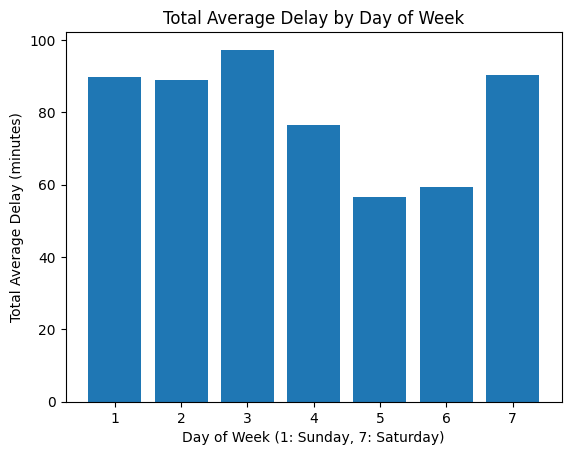

In [145]:
# Create a bar graph: x-axis is the Day (1 - Sunday, 7 - Saturday) and the 
# height is the TOTAL average delays from all flights on that day.

plt.bar(
    x = df_group_by_day_delays.index, 
    height = df_group_by_day_delays["TOTAL"]
)

plt.xlabel("Day of Week (1: Sunday, 7: Saturday)")
plt.ylabel("Total Average Delay (minutes)")
plt.title("Total Average Delay by Day of Week")

# Which day of the week did flights have the least total average delay?
print("Evidently we should book flights on Thursdays!")

# Problem 3.2

* Using similar syntax as in the above problem, create a similar `df_group_by_airline` DataFrame where each row represents an airline and the columns are the average amount of time over all flights for DEPARTURE_DELAY, ARRIVAL_DELAY, etc (basically, group by the AIRLINE column instead of the DAY_OF_WEEK column).
* Add the TOTAL column as above.
* Sort  `df_group_by_airline` by the TOTAL column.
* Create a bar graph: x-axis is the Airline and the height is the TOTAL average delays from all flights on that day. 
* Which airline had the least total delay on average?

In [148]:
delay_columns = [
    'DEPARTURE_DELAY', 
    'ARRIVAL_DELAY',
    'SECURITY_DELAY', 
    'WEATHER_DELAY',
    'AIR_SYSTEM_DELAY', 
    'LATE_AIRCRAFT_DELAY'
]

df_group_by_airline_delays = df.groupby("AIRLINE")[delay_columns].mean()

In [150]:
# Add column `TOTAL` that is the sum of all other columns

df_group_by_airline_delays["TOTAL"] = (
    df_group_by_airline_delays['DEPARTURE_DELAY']  
    + df_group_by_airline_delays['ARRIVAL_DELAY'] 
    + df_group_by_airline_delays['SECURITY_DELAY']  
    + df_group_by_airline_delays['WEATHER_DELAY'] 
    + df_group_by_airline_delays['AIR_SYSTEM_DELAY']  
    + df_group_by_airline_delays['LATE_AIRCRAFT_DELAY']
)

# Sort `df_group_by_airline_delays` by the TOTAL column
df_group_by_airline_delays.sort_values("TOTAL", inplace=True)

df_group_by_airline_delays

,DEPARTURE_DELAY,ARRIVAL_DELAY,SECURITY_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY,LATE_AIRCRAFT_DELAY,TOTAL
AIRLINE,,,,,,,
HA,1.045470,-0.125219,0.113725,0.180392,0.215686,10.372549,11.802605
AS,4.329595,-0.726276,0.335828,2.088868,15.630496,16.210477,37.868987
MQ,12.980735,7.966655,0.202941,11.661765,13.945098,23.519118,70.276312
AA,15.799556,12.077224,0.181798,4.571351,15.006190,23.108927,70.745047
WN,21.169023,15.760767,0.097845,2.140814,6.225587,32.592053,77.986090
EV,17.590725,14.716945,0.000000,1.735970,15.244058,30.725384,80.013082
DL,19.170761,12.220539,0.026855,9.875033,16.530444,26.476602,84.300233
OO,19.715568,18.541909,0.159470,2.806078,14.162931,31.259365,86.645320
NK,22.019628,20.910899,0.304923,1.483854,20.869772,23.486501,89.075578


Hawaiian Airlines is exceeldinly reliable!


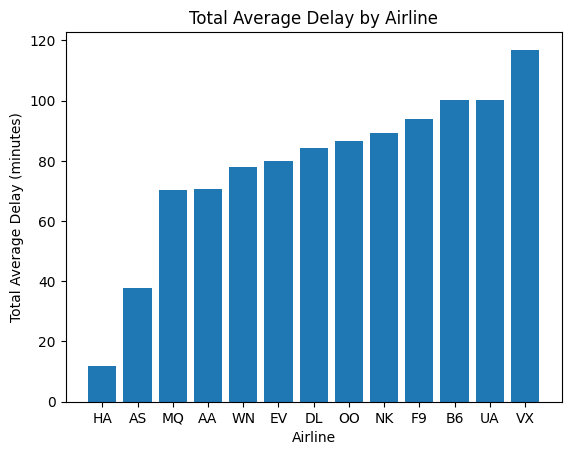

In [152]:
# Create a bar graph: x-axis is the Airline and the 
# height is the TOTAL average delays from all flights on that day.

plt.bar(
    x = df_group_by_airline_delays.index, 
    height = df_group_by_airline_delays["TOTAL"]
)

plt.xlabel("Airline")
plt.ylabel("Total Average Delay (minutes)")
plt.title("Total Average Delay by Airline")

# Which airline had the least total delay on average?
print("Hawaiian Airlines is exceeldinly reliable!")

# Problem 4 - Airports

Let's load the airports dataframe from <b> airports.csv</b>.

In [159]:
# load airport data
df_airports = pd.read_csv("airports.csv")

# Set the index of df_airpoirts to be the airport code
df_airports = df_airports.set_index('IATA_CODE')
df_airports

,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
IATA_CODE,,,,,,
ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...
WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681


Below is code to create another DataFrame that contains a single column (indexed by the airport code) representing the number of flights for which the airport is the destination.

In [161]:
# Group by destination airport, get count and then convert to a DataFrame
df_tmp = df.groupby("DESTINATION_AIRPORT").size().to_frame('size')

# Rename "DESTINATION_AIRPORT to be IATA_CODE and set it as the DataFrame index
df_tmp = (
    df_tmp.reset_index()
    .rename(columns={"DESTINATION_AIRPORT": "IATA_CODE"})
    .set_index("IATA_CODE")
)

# Rename size to be the NUMBER_OF_FLIGHTS_TO
df_tmp = df_tmp.rename(columns={'size': 'NUMBER_OF_FLIGHTS_TO'})

# View the DataFrame
df_tmp

,NUMBER_OF_FLIGHTS_TO
IATA_CODE,
ABE,48
ABI,96
ABQ,752
ABR,28
ABY,26
...,...
VPS,204
WRG,26
XNA,327


Create a new DataFrame called `df3` that is the result of merging `df_airports`and `df_tmp` on the IATA_CODE column.

In [166]:
# Perform an outer join on the `IATA_CODE` column
df3 = df_airports.merge(df_tmp, on = "IATA_CODE", how = "outer")

# View the DataFrame
df3

,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,NUMBER_OF_FLIGHTS_TO
IATA_CODE,,,,,,,
ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,48.0
ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,96.0
ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,752.0
ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,28.0
ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,26.0
...,...,...,...,...,...,...,...
WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982,26.0
WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764,NaN
XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681,327.0


Now, create a scatter plot of the coordinates of `df3` using `df3.plot.scatter()`. Set the x-axis to be the LONGITUDE column and the y-axis to be the LATITUDE column of the airports. Then, use the `NUMBER_OF_FLIGHTS_TO` column to be the color of each point in the plot.

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

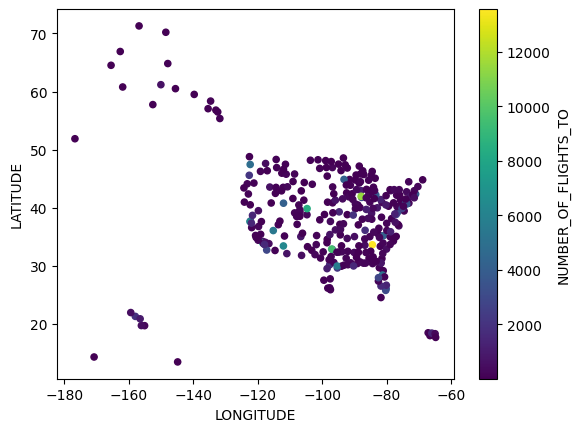

In [179]:
df3.plot.scatter(x = "LONGITUDE", y = "LATITUDE", c = "NUMBER_OF_FLIGHTS_TO")

Knowing that Atlanta, GA has the busiest airport in the world, does this figure make sense? 

<u> **Response:** </u>

I now know precisely where Atlanta, GA is on the map!

Yes, this makes sense. This map suggests there is an airport that is an order of magnitude more popular than the average concentrated somewhere in Georgia. Indeed, the number of flights to ATL is 13,571 while the median number of flights for all airports is only 113.

In [189]:
print(f"Median number of arriving flights = {df_tmp.median().iloc[0]}.")
df_tmp.sort_values("NUMBER_OF_FLIGHTS_TO", ascending=False)

Median number of arriving flights = 113.0.


,NUMBER_OF_FLIGHTS_TO
IATA_CODE,
ATL,13571
ORD,11431
DFW,9494
DEN,8422
LAX,7888
...,...
ADQ,13
OTH,10
UST,8
